# Język Python - Wykład 9.

## Moduły naukowe

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

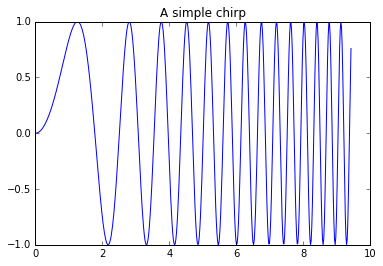

In [3]:
x = np.linspace(0, 3*np.pi, 500)
plt.figure()
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

[('King.', 108),
 ('shall', 101),
 ('lord,', 79),
 ('Queen.', 74),
 ('would', 64),
 ('Laer.', 62),
 ('[Enter', 61),
 ('lord.', 57),
 ('should', 55),
 ('their', 54)]


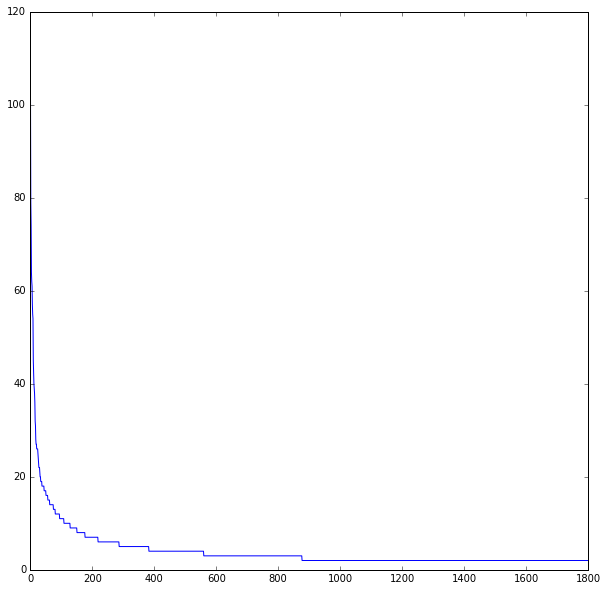

In [10]:
from collections import Counter

with open('L10_files/hamlet.txt') as l1:
    data = Counter(l1.read().split())
data = list(filter(lambda x:x[1]>1 and len(x[0])>4, sorted(data.items(), key=lambda x:x[1], reverse=True)))

from pprint import pprint
pprint(data[:10])

plt.figure(figsize=(10,10))
plt.plot(range(len(data)), [v[1] for v in data])
plt.show()

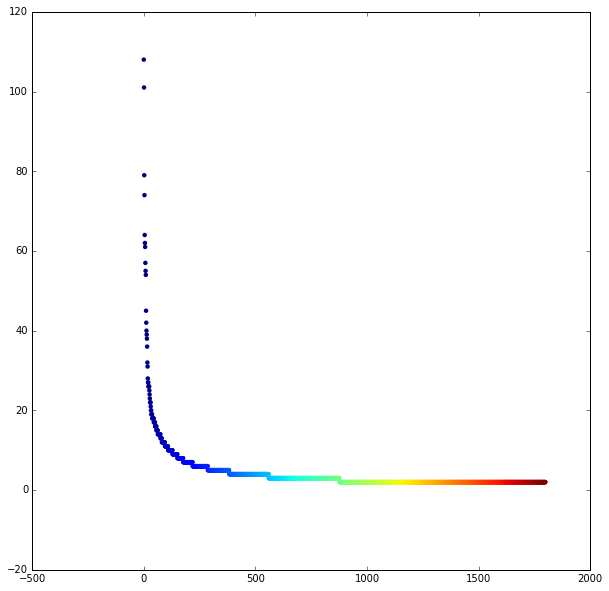

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(data)), [v[1] for v in data], linewidth=0, c=range(len(data)))
plt.show()

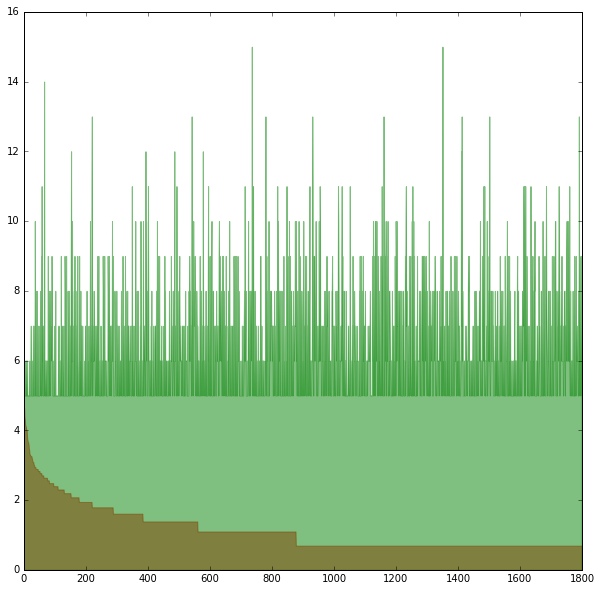

In [16]:
plt.figure(figsize=(10,10))
plt.gca().fill_between(range(len(data)), [np.log(v[1]) for v in data], color='red', alpha=0.5)
plt.gca().fill_between(range(len(data)), [len(v[0]) for v in data], color='green', alpha=0.5)
plt.show()

In [17]:
import scipy

$$
\int_0^{10} 3x^2 dx
$$

In [19]:
from scipy.integrate import quad
print(quad(lambda x:3*x**2, 0, 10))

(1000.0000000000001, 1.1102230246251567e-11)


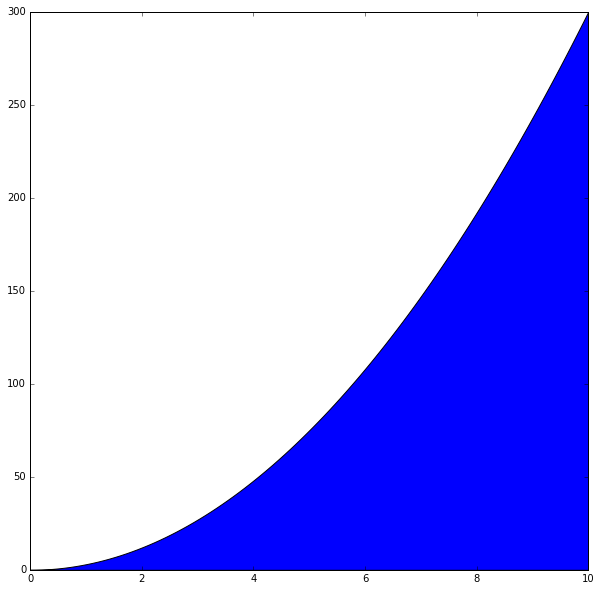

In [20]:
plt.figure(figsize=(10,10))
plt.gca().fill_between(np.linspace(0,10,100), [(lambda x: 3*x**2)(v) for v in np.linspace(0,10,100)])
plt.show()

$$
\int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-\tfrac{1}{2}\|x-4\|^2} dx
$$

In [22]:
normal1d = lambda x:1/np.sqrt(2*np.pi) * np.exp(-((x-4)*(x-4))/2)
print(quad(normal1d, -np.inf, np.inf))

(1.0, 1.0136410675605975e-08)


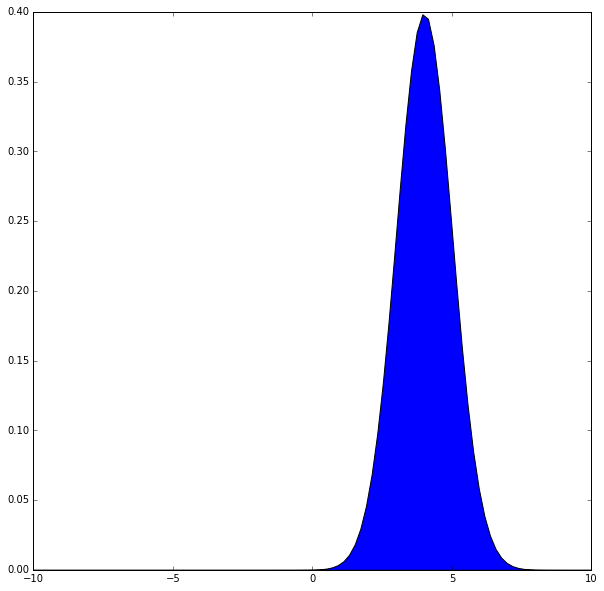

In [23]:
plt.figure(figsize=(10,10))
plt.gca().fill_between(np.linspace(-10,10,100), [normal1d(v) for v in np.linspace(-10,10,100)])
plt.show()

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \frac{1}{{2\pi}} e^{-\tfrac{1}{2}\|[x\; y]^T\|^2} dy\; dx
$$

In [24]:
from scipy.integrate import dblquad
normal2d = lambda y, x:1/(2*np.pi) * np.exp(-(x*x+y*y)/2)
print(dblquad(normal2d, -np.inf, np.inf, lambda x:-np.inf, lambda x:np.inf))

(1.0000000000000322, 1.3150127836612196e-08)


$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \frac{1}{(2\pi)^{3/2}} e^{-\tfrac{1}{2}\|[x\; y\; z]^T\|^2} dz\; dy\; dx
$$

In [26]:
from scipy.integrate import tplquad
normal3d = lambda z, y, x :1/(2*np.pi) ** (1.5) * np.exp(-(x*x+y*y+z*z)/2)
print(tplquad(normal3d, -np.inf, np.inf, lambda x:-np.inf, lambda x:np.inf, lambda x, y:-np.inf, lambda x, y:np.inf))

(1.0000000000011158, 1.48832244781721e-08)


In [27]:
from numpy import linalg as la

In [29]:
X = np.array([[1,2],[4,1]])
print(X)
print(la.inv(X))
print(la.inv(X).dot(X))

[[1 2]
 [4 1]]
[[-0.14285714  0.28571429]
 [ 0.57142857 -0.14285714]]
[[ 1.  0.]
 [ 0.  1.]]


In [30]:
X = np.array([[0.1,2],[3,60]])
print(la.inv(X))

[[ -7.20575940e+17   2.40191980e+16]
 [  3.60287970e+16  -1.20095990e+15]]


In [31]:
print(la.pinv(X))
print(la.pinv(X).dot(X))

[[  2.76777535e-05   8.30332604e-04]
 [  5.53555069e-04   1.66066521e-02]]
[[ 0.00249377  0.04987531]
 [ 0.04987531  0.99750623]]


[3]
[ 3.02255637]


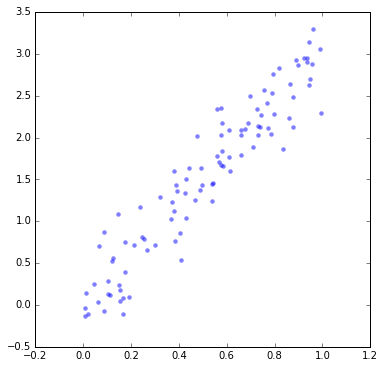

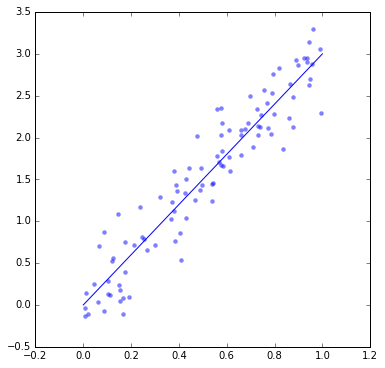

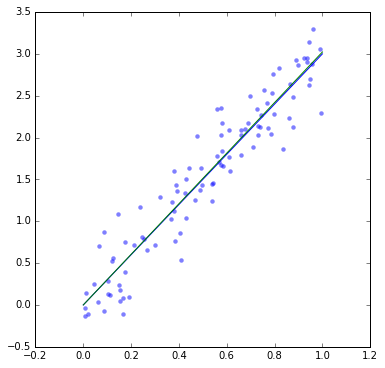

In [33]:
def plot_data(X, functions):
    plt.figure(figsize=(6, 6))
    plt.scatter(X.ravel(), y.ravel(), linewidth=0, alpha=0.5)
    for f in functions:
        plt.plot([0, 1], f.dot(np.array([[0, 1]])).ravel())        
    plt.show()

X = np.random.rand(100).reshape(1,100)
A = np.array([[3]])
y = (A.dot(X)).T + np.random.normal(size=(100, 1), scale=0.3)

solution = la.pinv(X).T.dot(y)

print(A.ravel())
print(solution.ravel())


plot_data(X, [])
plot_data(X, [A])
plot_data(X, [A, solution])


$$
XA = y
$$
$$
X^TXA = X^Ty
$$
$$
(X^TX)^{-1}X^Ty \approx A
$$
$$
X^\dagger y \approx A
$$

In [35]:
print(dir(la))

['LinAlgError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_numpy_tester', '_umath_linalg', 'absolute_import', 'bench', 'cholesky', 'cond', 'det', 'division', 'eig', 'eigh', 'eigvals', 'eigvalsh', 'info', 'inv', 'lapack_lite', 'linalg', 'lstsq', 'matrix_power', 'matrix_rank', 'multi_dot', 'norm', 'pinv', 'print_function', 'qr', 'slogdet', 'solve', 'svd', 'tensorinv', 'tensorsolve', 'test']


In [36]:
print(la.solve(X.dot(X.T), X.dot(y))) # AX = y --> X = solve(A, y)

[[ 3.02255637]]


In [37]:
print(la.lstsq(X.T, y))

(array([[ 3.02255637]]), array([ 8.81740425]), 1, array([ 5.85524547]))


In [38]:
print(la.qr(X.T.dot(X))) # Rozklad QR

(array([[ -1.60097098e-01,   7.57257761e-01,   1.82077351e-01, ...,
         -2.94318125e-06,  -1.26946051e-04,   1.12774489e-04],
       [ -1.53132534e-01,  -4.81570126e-02,  -5.12174528e-02, ...,
          1.66295069e-02,  -2.18639388e-02,  -1.73007924e-03],
       [ -1.50359288e-02,  -3.68717191e-03,  -5.33065336e-03, ...,
          6.93781910e-02,  -1.89412335e-02,   4.20017010e-02],
       ..., 
       [ -1.69605987e-01,  -1.23702032e-01,  -2.53520592e-01, ...,
         -9.06205632e-03,  -1.29143362e-02,  -6.44294020e-04],
       [ -6.56657557e-02,   3.23908723e-02,  -1.58323082e-01, ...,
          2.78838587e-02,  -4.00163429e-02,  -2.82345484e-03],
       [ -8.43834708e-02,  -7.72013587e-03,   5.99123044e-02, ...,
          2.43975835e-02,  -1.73626842e-02,   2.04646060e-03]]), array([[ -5.48875283e+00,  -5.24998041e+00,  -5.15490271e-01, ...,
         -5.81475462e+00,  -2.25127817e+00,  -2.89299443e+00],
       [  0.00000000e+00,   6.96217431e-16,   4.45337122e-17, ...,
       

In [39]:
print(la.cholesky(X.T.dot(X) + np.eye(100))) # Dekompozycja Choleskiego, rozklad Choleskiego

[[ 1.37066896  0.          0.         ...,  0.          0.          0.        ]
 [ 0.61320906  1.194955    0.         ...,  0.          0.          0.        ]
 [ 0.06021038  0.03516181  1.00144357 ...,  0.          0.          0.        ]
 ..., 
 [ 0.67917591  0.39662689  0.0325437  ...,  1.01443927  0.          0.        ]
 [ 0.26295416  0.15356064  0.01259983 ...,  0.01110123  1.00211618  0.        ]
 [ 0.337908    0.19733238  0.01619135 ...,  0.01426559  0.00543304
   1.00347744]]


In [40]:
from scipy import optimize

f( 0.699999999784 )= -1.0


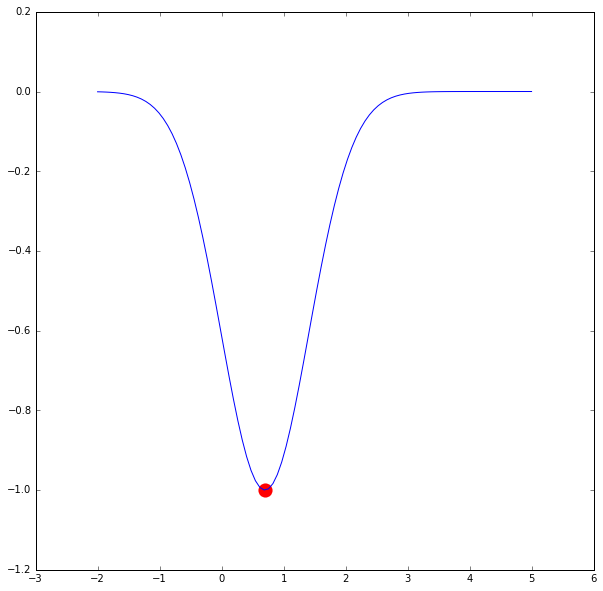

In [41]:
def f(x):
    return -np.exp(-(x-0.7)**2)

x_min = optimize.brent(f) 
print('f(',x_min,')=', f(x_min))

x = np.linspace(-2, 5, 100)

plt.figure(figsize=(10,10))
plt.plot(x, f(x))
plt.scatter([x_min], [f(x_min)], c='red', s=200, linewidth=0)
plt.show()

In [42]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

x_min = optimize.fmin_cg(f, [2, 2])
print(x_min)

         Current function value: 1.433785
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[ 1.01684866  2.23132972]


In [43]:
def fprime(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

x_min = optimize.fmin_cg(f, [2, 2], fprime=fprime)
print(x_min)

         Current function value: 1.433785
         Iterations: 1
         Function evaluations: 14
         Gradient evaluations: 2
[ 1.01684866  2.23132973]


In [44]:
x_min = optimize.minimize(fun=f, x0=[2, 2], jac=fprime)
print(x_min)

      fun: 1.8414093407262628e-11
 hess_inv: array([[ 0.95489113,  1.90006768],
       [ 1.90006768,  4.27872719]])
      jac: array([  9.88085521e-07,   2.41739812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.00000582,  1.00001285])


In [45]:
x_min = optimize.minimize(fun=f, x0=[2, 2], jac=fprime, constraints=[{'type': 'eq', 'fun': lambda x : x[0]+x[1]}])
print(x_min)

     fun: 0.37623482510170186
     jac: array([-0.5391743 , -0.54078743,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 10
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.2213832, -0.2213832])


In [46]:
x_min = optimize.minimize(fun=f, x0=[2, 2], constraints=[{'type': 'eq', 'fun': lambda x : x[0]+x[1]}])
print(x_min)

     fun: 0.37623482510046402
     jac: array([-0.53917429, -0.54078741,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.2213832, -0.2213832])


[ 0.95213141  3.63843282]


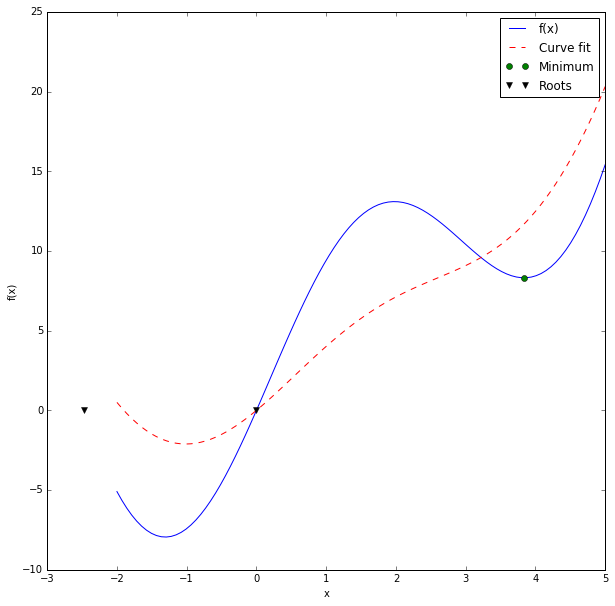

In [47]:

def f(x):
    return x**2 + 10*np.sin(x)

xmin = optimize.minimize(f, x0=np.array([np.random.normal()*10]))['x']
root = optimize.fsolve(f, 1)
root2 = optimize.fsolve(f, -2.5)

xdata = np.linspace(-10, 10, 10)
ydata = f(xdata) + np.random.normal(size=xdata.size, scale=10)

def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

params, params_covariance = optimize.curve_fit(f2, xdata, ydata)

print(params)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit")

ax.plot(xmin, f(xmin), 'go', label="Minimum")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

